<a href="https://colab.research.google.com/github/Asuskf/AI6-UIO_ReinforcementLearning/blob/development/session_3/AI6_RL_K_Bandidos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# El problema de los k bandidos
Imagina que te encuentras en un casino donde hay 4 diferentes máquinas. 

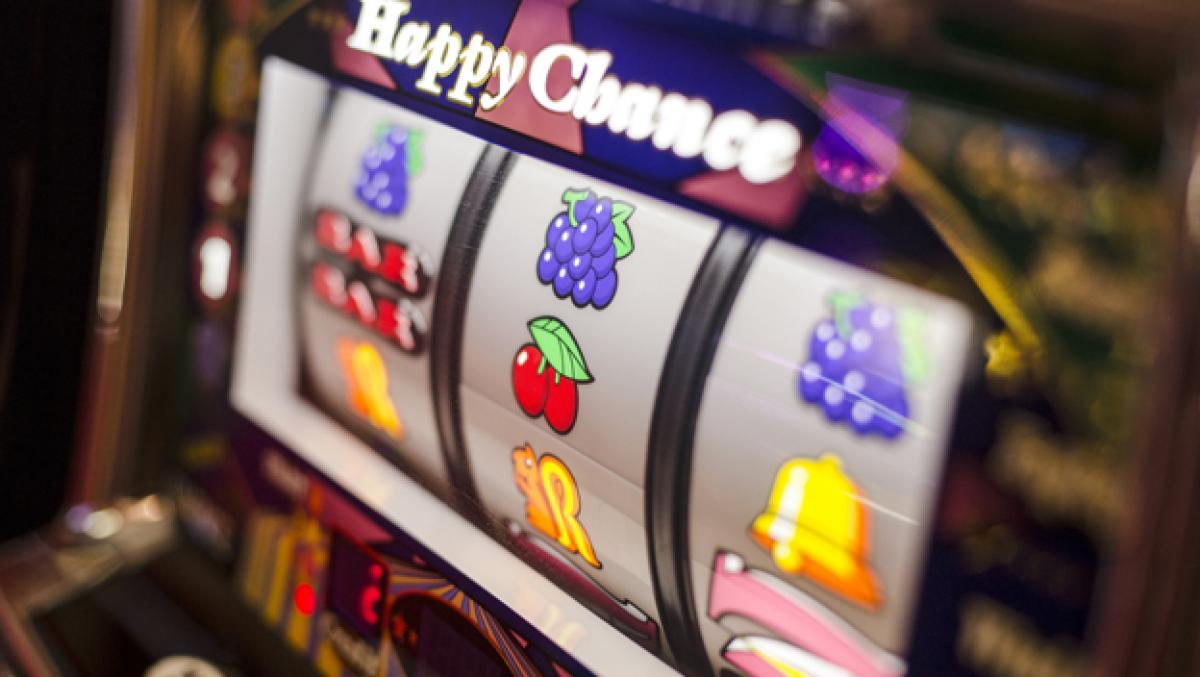



Cada una de las máquinas da un diferente premio bajo una diferente probabilidad. Tu trabajo sera bajo una serie de intentos (digamos 1000) maximizar la cantidad de premios obtenidos y descubrir cual es la máquina que mejores premios otorga. Las probabilidades y los montos del premio que otorgan las maquinas son fijos (es decir no cambian con el tiempo). 

**¿Como le harías para maximizar el premio obtenido?**

## Posibles soluciones
 
 
1. Jugar la misma cantidad de veces en todas las máquinas.
2. Jugar más tiempo en la máquina que creemos que da mejores regalos.
3. **Buscar probar diferentes máquinas y en base a nuestro análisis exploratorio jugar en el tiempo que nuestro análisis indica que obtendremos una recompensa positiva (premio).**
 
Antes de continuar con esta solución es necesario introducir un poco de notación. Llamemos:
 
*  $A_{t}=$La acción realizada en el paso $_{t}.$ (En nuestro ejemplo sería la máquina en la que se jugó en el intento $_{t}$)
 
*  $R_{t}=$El premio obtenido en el paso $_{t}$
 
*  $q*(a)=$ El premio esperado al realizar la acción $_{a}$
 
**Nuestra fórmula final**
 
$$ q*(a) \doteq \mathbb{E}[R_{t} | A_{t} = a]$$
 
**En español:**  La definición o punto de referencia de la expectativa de recompensa  es la esperanza de obtener un premio en base a la acción ejecutada en un tiempo determinado.
&nbsp;

&nbsp;



El premio esperado es el valor más importante dado que si supiéramos cuál es la máquina con mayor recompensa, siempre jugaríamos en esa máquina. Sin embargo, este valor usualmente no lo conocemos y es por esto que necesitaremos explorar (jugar) en las diferentes máquinas para llegar a tener una estimación.
 
Conforme vayamos explorando iremos estimando este valor y lo escribiremos como $Q_{t}(a)$es decir, el valor esperado estimado de a en el paso $t$.
 


## **Estimando los valores esperados de las acciones**
Existen varias maneras de calcular los valores esperados de las acciones $Q_{t}(a)$. En este caso utilizaremos la que a mi parecer es la mas natural. Sumaremos todos los premios obtenidos al realizar una acción y lo dividiremos entre el número de veces que se realizo esta acción.

$$Q_{t}(a) \doteq \frac{Suma\ de\ los\ premios\ obtenidos\ al\ realizar\ una\ acción\ _{a}\ en\ un\ tiempo\ _{t} }{Número\ de\ veces\ que\ se\ realizo\ una\ acción\ _{a}\ en\ un\ tiempo\ _{t}}  $$

$$= \frac{\sum_{i=1}^{t-1} R_{i}*1_{A_{i} = a}}{\sum_{i=1}^{t-1} 1_{A_{i}=a}}$$

Sabemos por la ley de los grandes números que si pudiéramos realizar pruebas infinitas entonces nuestra estimación sería igual al valor real de $(Q_{t}(a))$.

Esto en la realidad no es posible **no tenemos dinero infinito** por lo que tenemos que idear una forma de explorar y explotar las diferentes opciones que tenemos.





# Resolución usando el metodo método denominado [$\varepsilon$-greedy.](https://www.baeldung.com/cs/epsilon-greedy-q-learning)

Este método es muy sencillo pues lo único que haremos es escoger la opción que creemos mas viable pero establecer una probabilidad($\varepsilon$) en la cual en vez de escoger la opción mas viable seleccionemos una de las otras opciones de forma aleatoria. 

Es decir si establecemos que esta probabilidad sea de 10%
entonces el 90% de las veces escogeremos la que creemos es la mejor opción y el otro lo utilizaremos para explorar entre las diferentes opciones.

## ¿Que máquina escogerías?



In [1]:
import random as rd
import numpy as np

El siguiente paso sera definir dos funciones auxiliares. La primera nos ayudara a emular resultados probabilísticos. Esta función dará un numero aleatorio del 0 al 1 y dependiendo de la probabilidad que definamos este dará un resultado verdadero o falso. Es decir si definimos $\varepsilon$=70 entonces todos los números aleatorios del 0 al 69 darán un resultado positivo(verdadero) y los demas números un resultado negativo(falso). Igualmente nos servirá de ayuda a la hora de jugar en cada máquina. Dependiendo del resultado de esta función sabremos que premio hemos ganado.

In [5]:
###Se define una probabilidad aleatoria en el intervalo (0,1)
###para simular resultados de una serie de experimentos.
def decision(probability):
    return rd.random() < probability 

La siguiente función sera el algoritmo $\varepsilon$-greedy con ayuda de la función probabílistica previamente definida decidiremos jugar en la máquina que tenga mayor valor esperado estimado o jugaremos aleatoriamente en cualquiera de las otras máquinas.


In [6]:
### Escoges la máquina con el algortimo E-greedy
def greedy(no_maquinas,probabilidad):
     aux=decision(probabilidad)
     if(aux==True):
       while True:
          index=rd.randint(0,len(no_maquinas)-1)
          if index!=np.argmax(no_maquinas):
              break
     else:
          index=np.argmax(no_maquinas)
     return index

Para realizar un verdadero experimento necesitamos probar varias veces el algoritmo. En este caso establecimos como regla que solo se podía jugar 100 veces y que con estas 100 veces intentaríamos maximizar los premios obtenidos y descubrir cual es la mejor máquina. Pensemos que jugar 100 veces es solo 1 ciclo. Para tener una idea del premio promedio que se obtiene al jugar 100 veces repetiremos el experimento por un total de 10,000 ciclos. Así mismo probaremos estos 10,000 ciclos con $\varepsilon$=0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1.


De esta forma sabremos que tanto nos conviene explorar o ser ambiciosos y explotar nuestro conocimiento.

Primero definiremos las variables que nos ayudaran con este experimento.

In [3]:
### En esta variable estamos escribiendo la probabilidad de ganar en cada máquina.Esta variable es la probabilidad real de ganar y es la que intentaremos estimar.
pos_ganar=[.7,.8,.9,.3]
###Definiremos la probabilidad de cambiar de máquina(Epsilon) para el algoritmo.
p=[0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1]
###Variables que guardan el total por cada parámetro de probabilidad(E=(0,.1,.2,...).
p_total_reward=[]
p_maquina_escogida=[]

Dada la construcción del experimento se deberán poner 3 bucles; el primero para cada una de las $\varepsilon$(p=[0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1]), el segundo para cada uno de los ciclos (10,000 ciclos) y el tercero que juegue las 100 veces. 

### Primer Bucle.


In [ ]:
for j in range(len(p)):
    ### Veremos como evoluciona el premio promedio. Esta variable nos ayudara a medirel desempeño de nuestro algoritmo. Son los premios promedio de cada ciclo.
    premio_promedio=[]
    ###Esta variable contiene el premio total de cada ciclo.
    total_reward_acum_g=[]
    ###Al final de cada ciclo escribiremos cual creemos que es la mejor máquinay se guardara en esta variable.
    maquina_escogida_g=[]

### Segundo bucle.

In [ ]:
for x in range(10000):
    ###Probaremos el algoritmo varias veces para ver que tal funciona
    ### Variable que indica el premio total obtenido a lo largo de jugar 100 veces.
    total_reward=0
    ### El numero de veces que se ha jugado
    i=0
    ### El número de veces que se ha probado cada máquina
    iteraciones_por_accion=[0,0,0,0]
    ### El premio promedio calculado de cada máquina. Se inicializa en 100 para
    ### que inicialmente el algoritmo intente jugar en todas las máquinas.
    premio_promedio_accion=[0,0,0,0]

### Tercer bucle.

In [ ]:
for x in range(100):
          ###El index es el equivalente a la maquina que escogiste para jugar.
          index=greedy(premio_promedio_accion,p[j])
          ###Esta parte emula si ganaste o perdiste
          res=decision(pos_ganar[index])
          if (res==True):
               g=2
          else:
               g=1
          ###Premio promedio total
          total_reward=total_reward+g
          ###Sumamos la iteración
          i=i+1
          premio_promedio.append(total_reward/i)
          ###Número de veces que se realizo la accion (se jugo en la máquina).
          iteraciones_por_accion[index]=iteraciones_por_accion[index]+1
          ###Actualizas el valor del premio promedio de la accion(El estimado del valor esperado)
          premio_promedio_accion[index]=(premio_promedio_accion[index])+(1/iteraciones_por_accion[index])*(g-premio_promedio_accion[index])
          ###Anexo los resultados obtenidos despues de 100 intentos
          total_reward_acum_g.append(total_reward)
          maquina_escogida_g.append(np.argmax(premio_promedio_accion))
     ### Hago un promedio de los resultados obtenidos.
     print(p[j])
     print("En promedio se hicieron "+str(sum(total_reward_acum_g)/len(total_reward_acum_g))+" puntos.")
     print("Se escogio " +str(maquina_escogida_g.count(np.argmax(pos_ganar)))+" veces la máquina correcta.")
     p_total_reward.append(sum(total_reward_acum_g)/len(total_reward_acum_g))
     p_maquina_escogida.append(maquina_escogida_g.count(np.argmax(pos_ganar)))
     ### Reinicio contadores
     premio_promedio=[]
     total_reward_acum_g=[]
     maquina_escogida_g=[]

# Scrypt completo

In [7]:
for j in range(len(p)):
    premio_promedio=[]
    total_reward_acum_g=[]
    maquina_escogida_g=[]
    for x in range(10000):
        total_reward=0
        i=0
        iteraciones_por_accion=[0,0,0,0]
        premio_promedio_accion=[0,0,0,0]
        for x in range(100):
            index=greedy(premio_promedio_accion,p[j])
            res=decision(pos_ganar[index])
            if (res==True):
                g=2
            else:
                g=1
            total_reward=total_reward+g
            i=i+1
            premio_promedio.append(total_reward/i)
            iteraciones_por_accion[index]=iteraciones_por_accion[index]+1
            premio_promedio_accion[index]=(premio_promedio_accion[index])+(1/iteraciones_por_accion[index])*(g-premio_promedio_accion[index])
            total_reward_acum_g.append(total_reward)
            maquina_escogida_g.append(np.argmax(premio_promedio_accion))
    print(p[j])
    print("En promedio se hicieron "+str(sum(total_reward_acum_g)/len(total_reward_acum_g))+" puntos.")
    print("Se escogio " +str(maquina_escogida_g.count(np.argmax(pos_ganar)))+" veces la máquina correcta.")
    p_total_reward.append(sum(total_reward_acum_g)/len(total_reward_acum_g))
    p_maquina_escogida.append(maquina_escogida_g.count(np.argmax(pos_ganar)))
    premio_promedio=[]
    total_reward_acum_g=[]
    maquina_escogida_g=[]

0
En promedio se hicieron 85.899688 puntos.
Se escogio 0 veces la máquina correcta.
0.1
En promedio se hicieron 89.755689 puntos.
Se escogio 509097 veces la máquina correcta.
0.2
En promedio se hicieron 89.842438 puntos.
Se escogio 614927 veces la máquina correcta.
0.3
En promedio se hicieron 89.243104 puntos.
Se escogio 662350 veces la máquina correcta.
0.4
En promedio se hicieron 88.29862 puntos.
Se escogio 677158 veces la máquina correcta.
0.5
En promedio se hicieron 87.249475 puntos.
Se escogio 673654 veces la máquina correcta.
0.6
En promedio se hicieron 86.075461 puntos.
Se escogio 655578 veces la máquina correcta.
0.7
En promedio se hicieron 85.086705 puntos.
Se escogio 633532 veces la máquina correcta.
0.8
En promedio se hicieron 84.107904 puntos.
Se escogio 579764 veces la máquina correcta.
0.9
En promedio se hicieron 83.399094 puntos.
Se escogio 466263 veces la máquina correcta.
1
En promedio se hicieron 83.613598 puntos.
Se escogio 67399 veces la máquina correcta.


### Resultados gráficos.


Text(0.5, 0, 'Epsilon')

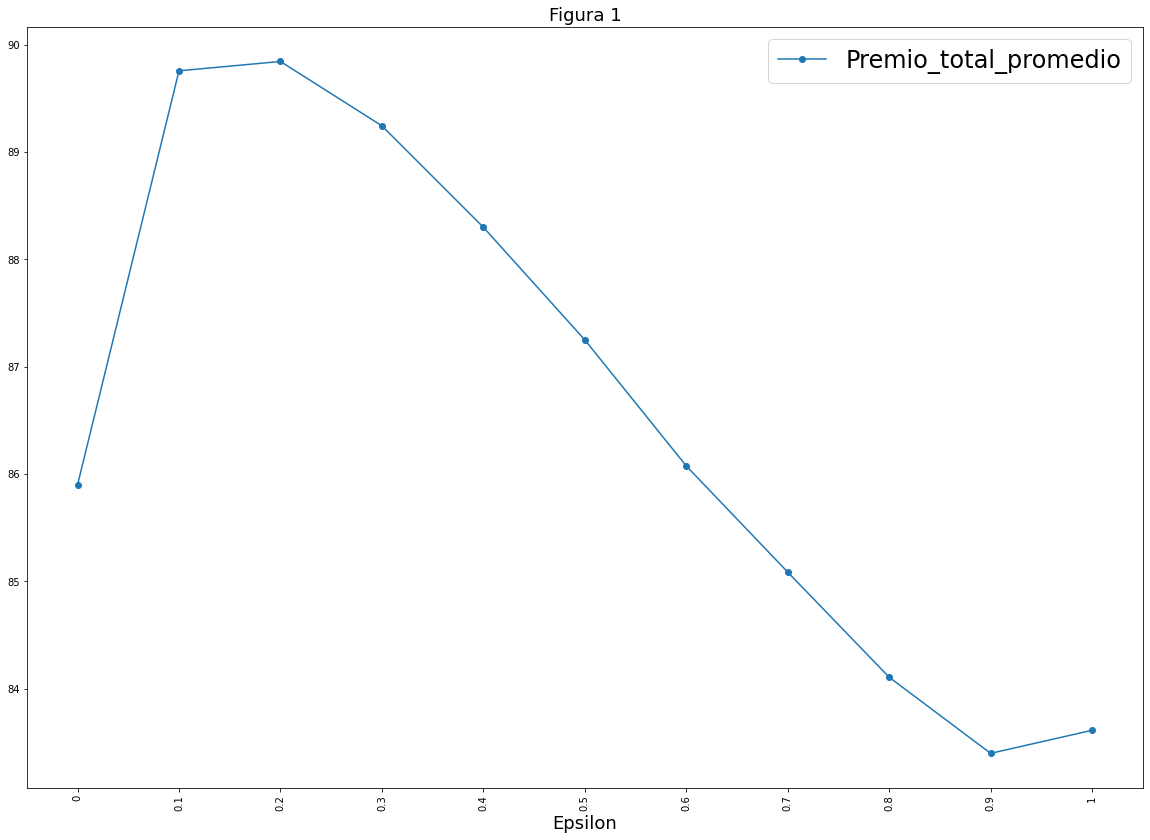

In [8]:
import matplotlib.pyplot as plt
valores=p_total_reward
valores2=p_maquina_escogida
eje_x=p
eje_x[-1]
fig, ax = plt.subplots(figsize=(20, 14))
plt.xticks(rotation=90)
plt.plot([str(i) for i in p], valores , marker ="o",label = "Premio_total_promedio");
#plt.plot(x, y, marker ="o", label = "Modelo Atribución");
ylabels = ['{:,}'.format(int(x)) + "K" for x in ax.get_yticks()*(1/1000)]
plt.legend(prop={'size': 24})
plt.title("Figura 1", fontdict=None, loc='center', pad=None,fontsize=18)
plt.xlabel("Epsilon", fontdict=None, labelpad=None,fontsize=18)

Text(0.5, 0, 'Epsilon')

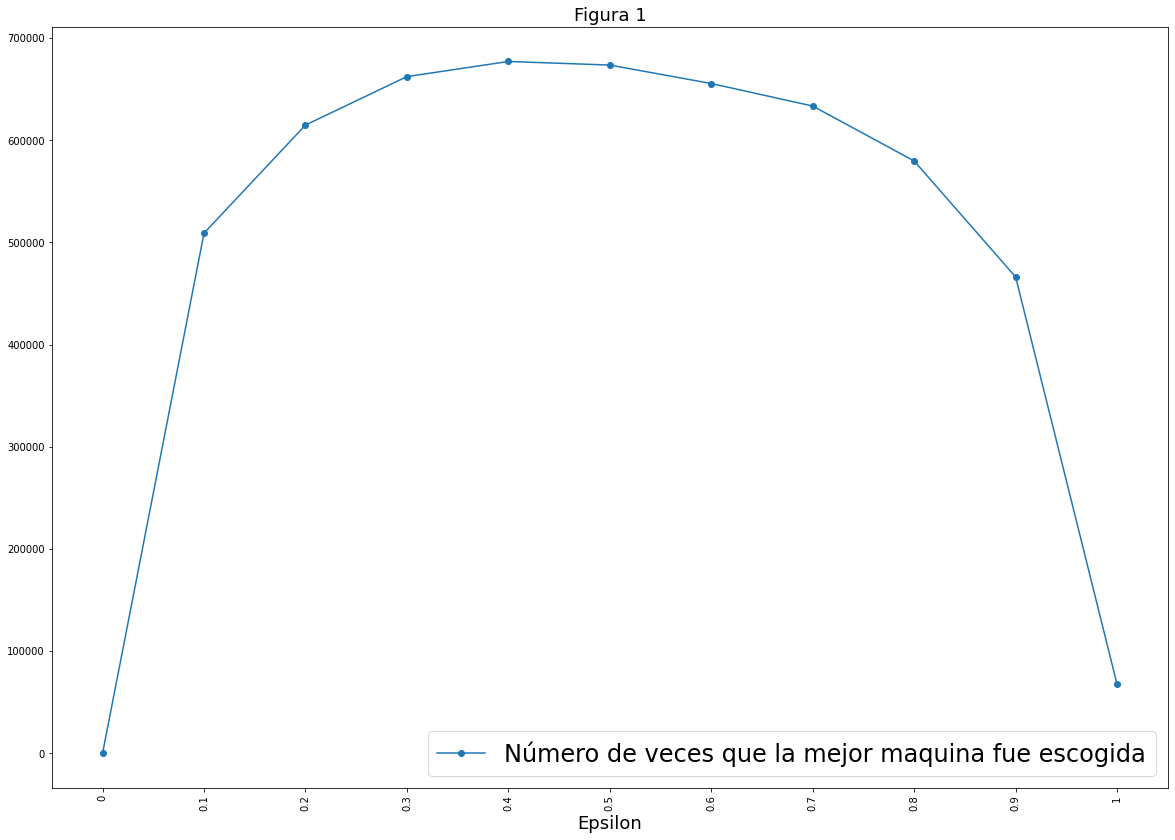

In [9]:
import matplotlib.pyplot as plt
valores=p_total_reward
valores2=p_maquina_escogida
eje_x=p
eje_x[-1]
fig, ax = plt.subplots(figsize=(20, 14))
plt.xticks(rotation=90)
plt.plot([str(i) for i in p], valores2 , marker ="o",label = "Número de veces que la mejor maquina fue escogida");
#plt.plot(x, y, marker ="o", label = "Modelo Atribución");
ylabels = ['{:,}'.format(int(x)) + "K" for x in ax.get_yticks()*(1/1000)]
plt.legend(prop={'size': 24})
plt.title("Figura 1", fontdict=None, loc='center', pad=None,fontsize=18)
plt.xlabel("Epsilon", fontdict=None, labelpad=None,fontsize=18)

# Fuente
https://ichi.pro/es/aprendizaje-por-refuerzo-inteligencia-artificial-y-aprendizaje-automatico-276432152889918

https://www.baeldung.com/cs/epsilon-greedy-q-learning

https://medium.com/estudio-de-datos/el-problema-de-los-k-bandidos-con-aprendizaje-por-refuerzo-bf9144698d68

